Pour améliorer les performances de la régression logistique on utilise la **normalsation** 

In [18]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Chargement du jeu de données depuis le fichier CSV
dataset =pd.read_csv('non_equilibres_data.csv')

In [20]:
# Faire une copie 
data = dataset.copy()

In [21]:
data.head()

,type,amount,oldbalanceOrg,nameDest,oldbalanceDest,isFraud,isFlaggedFraud
0,1,9839.64,170136.0,1,0.0,0,0
1,1,1864.28,21249.0,1,0.0,0,0
2,2,181.00,181.0,0,0.0,1,0
3,3,181.00,181.0,0,21182.0,1,0
4,1,11668.14,41554.0,1,0.0,0,0


In [22]:
# Sélectionner les lignes frauduleuses et non frauduleuses
fraudulent = data[data['isFraud'] == 1]
normal = data[data['isFraud'] == 0]

# Obtenir les valeurs uniques dans la colonne 'type' pour les transactions normales
unique_types = normal['type'].unique()

# Créer un DataFrame vide pour stocker l'échantillon équilibré
sample_data = pd.DataFrame()

# Effectuer l'échantillonnage équilibré pour chaque type de transaction normale
for type_value in unique_types:
    type_data = normal[normal['type'] == type_value]    # Sélectionner les données du même type
    
    sample_size = int(0.5 * len(type_data))     # Déterminer la taille de l'échantillon (50% des données de chaque type)
    
    sample = type_data.sample(n=sample_size, random_state=42)     # Effectuer l'échantillonnage aléatoire en fixant la graine aléatoire pour la reproductibilité (seed)
    
    sample_data = pd.concat([sample_data, sample])     # Ajouter l'échantillon au DataFrame d'échantillons

combined_data = pd.concat([fraudulent, sample_data]) # Combiner les données frauduleuses avec l'échantillon équilibré des transactions normales


# Mélanger aléatoirement les données combinées pour assurer l'ordre aléatoire
combined_data = combined_data.sample(frac=1, random_state=42)


Entraînement du modèle de Régression Logistique...
Temps d'entraînement : 16.66 secondes
Évaluation du modèle de Régression Logistique...
Temps d'évaluation : 0.03 secondes
Résultats du modèle de Régression Logistique:
Exactitude : 1.00
F1-Score : 0.52
Précision : 0.96
Matrice de Confusion:
[[635387      3]
 [  1659     35]]


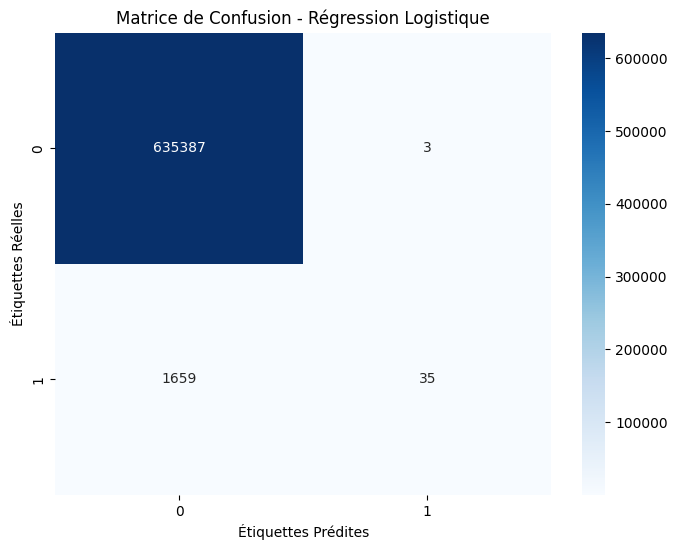

In [28]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import time


# Chargement des données et préparation des features et de la cible
x = combined_data.drop('isFraud', axis=1)   # Features
y = combined_data['isFraud']    # Target

# les Colonnes à normaliser
cols_a_normaliser = ['amount', 'oldbalanceOrg', 'oldbalanceDest']

# Initialiser le MinMaxScaler et fit_transform seulement les colonnes selectionnées 
scaler = MinMaxScaler()
X_robust = scaler.fit_transform(x[cols_a_normaliser])
x[cols_a_normaliser] = X_robust

# Séparation des données en ensembles d'entraînement et de test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Création du modèle de régression logistique
logreg_model = LogisticRegression(random_state=42)

# Entraînement, évaluation et comparaison des modèles

# Entraînement du modèle
print("Entraînement du modèle de Régression Logistique...")
start_time = time.time()

logreg_model.fit(x_train, y_train)

end_time = time.time()
training_time = end_time - start_time
print(f"Temps d'entraînement : {training_time:.2f} secondes")

# Évaluation du modèle
print("Évaluation du modèle de Régression Logistique...")
start_time = time.time()

y_pred_logreg = logreg_model.predict(x_test)

end_time = time.time()
testing_time = end_time - start_time
print(f"Temps d'évaluation : {testing_time:.2f} secondes")
    

# Calcul des métriques de performance
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg, average='macro')
precision_logreg = precision_score(y_test, y_pred_logreg, average='macro')
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

print("==============================")
print("Résultats du modèle de Régression Logistique:")
print(f"Exactitude : {accuracy_logreg:.2f}")
print(f"F1-Score : {f1_logreg:.2f}")
print(f"Précision : {precision_logreg:.2f}")
print("Matrice de Confusion:")
print(conf_matrix_logreg)
print("==============================")

# Affichage de la matrice de confusion sous forme graphique
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Étiquettes Prédites')
plt.ylabel('Étiquettes Réelles')
plt.title('Matrice de Confusion - Régression Logistique')
plt.show()



Avec Min Max : 
la precision a augementer jusqu'à 0.96 Tant dis que La F1 Score jusqu'à 0,52


Entraînement du modèle de Régression Logistique...
Temps d'entraînement : 18.42 secondes
Évaluation du modèle de Régression Logistique...
Temps d'évaluation : 0.04 secondes
Résultats du modèle de Régression Logistique:
Exactitude : 1.00
F1-Score : 0.55
Précision : 1.00
Matrice de Confusion:
[[635390      0]
 [  1612     82]]


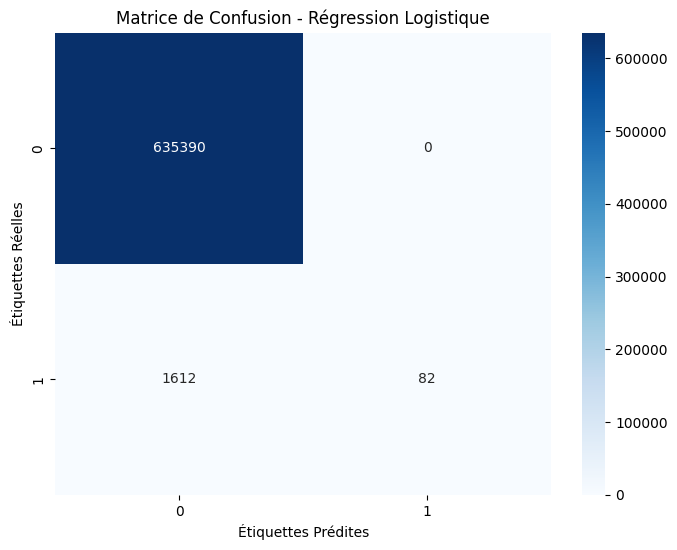

In [29]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import time


# Chargement des données et préparation des features et de la cible
x = combined_data.drop('isFraud', axis=1)   # Features
y = combined_data['isFraud']    # Target

# les Colonnes à normaliser
cols_a_normaliser = ['amount', 'oldbalanceOrg', 'oldbalanceDest']

scaler = RobustScaler()
X_robust = scaler.fit_transform(x[cols_a_normaliser])
x[cols_a_normaliser] = X_robust

# Séparation des données en ensembles d'entraînement et de test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Création du modèle de régression logistique
logreg_model = LogisticRegression(random_state=42)

# Entraînement, évaluation et comparaison des modèles

# Entraînement du modèle
print("Entraînement du modèle de Régression Logistique...")
start_time = time.time()

logreg_model.fit(x_train, y_train)

end_time = time.time()
training_time = end_time - start_time
print(f"Temps d'entraînement : {training_time:.2f} secondes")

# Évaluation du modèle
print("Évaluation du modèle de Régression Logistique...")
start_time = time.time()

y_pred_logreg = logreg_model.predict(x_test)

end_time = time.time()
testing_time = end_time - start_time
print(f"Temps d'évaluation : {testing_time:.2f} secondes")
    

# Calcul des métriques de performance
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg, average='macro')
precision_logreg = precision_score(y_test, y_pred_logreg, average='macro')
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

print("==============================")
print("Résultats du modèle de Régression Logistique:")
print(f"Exactitude : {accuracy_logreg:.2f}")
print(f"F1-Score : {f1_logreg:.2f}")
print(f"Précision : {precision_logreg:.2f}")
print("Matrice de Confusion:")
print(conf_matrix_logreg)
print("==============================")

# Affichage de la matrice de confusion sous forme graphique
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Étiquettes Prédites')
plt.ylabel('Étiquettes Réelles')
plt.title('Matrice de Confusion - Régression Logistique')
plt.show()


Avec RobustScaler : 
la precision a augementer jusqu'à 0.99 Tant dis que Le F1-Score jusqu'à 0,55

Entraînement du modèle de Régression Logistique...
Temps d'entraînement : 12.26 secondes
Évaluation du modèle de Régression Logistique...
Temps d'évaluation : 0.04 secondes
Résultats du modèle de Régression Logistique:
Exactitude : 1.00
F1-Score : 0.55
Précision : 1.00
Matrice de Confusion:
[[635390      0]
 [  1612     82]]


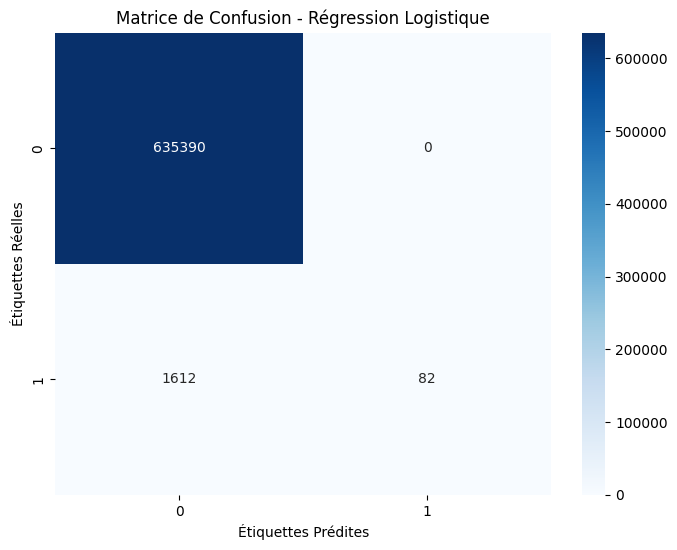

In [30]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import time


# Chargement des données et préparation des features et de la cible
x = combined_data.drop('isFraud', axis=1)   # Features
y = combined_data['isFraud']    # Target

# les Colonnes à normaliser
cols_a_normaliser = ['amount', 'oldbalanceOrg', 'oldbalanceDest']

scaler = StandardScaler()
X_robust = scaler.fit_transform(x[cols_a_normaliser])
x[cols_a_normaliser] = X_robust

# Séparation des données en ensembles d'entraînement et de test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Création du modèle de régression logistique
logreg_model = LogisticRegression(random_state=42)

# Entraînement, évaluation et comparaison des modèles

# Entraînement du modèle
print("Entraînement du modèle de Régression Logistique...")
start_time = time.time()

logreg_model.fit(x_train, y_train)

end_time = time.time()
training_time = end_time - start_time
print(f"Temps d'entraînement : {training_time:.2f} secondes")

# Évaluation du modèle
print("Évaluation du modèle de Régression Logistique...")
start_time = time.time()

y_pred_logreg = logreg_model.predict(x_test)

end_time = time.time()
testing_time = end_time - start_time
print(f"Temps d'évaluation : {testing_time:.2f} secondes")
    

# Calcul des métriques de performance
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg, average='macro')
precision_logreg = precision_score(y_test, y_pred_logreg, average='macro')
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

print("==============================")
print("Résultats du modèle de Régression Logistique:")
print(f"Exactitude : {accuracy_logreg:.2f}")
print(f"F1-Score : {f1_logreg:.2f}")
print(f"Précision : {precision_logreg:.2f}")
print("Matrice de Confusion:")
print(conf_matrix_logreg)
print("==============================")

# Affichage de la matrice de confusion sous forme graphique
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Étiquettes Prédites')
plt.ylabel('Étiquettes Réelles')
plt.title('Matrice de Confusion - Régression Logistique')
plt.show()


Avec StandardScaler : 
la precision a augementer jusqu'à 0.99 Tant dis que Le F1-Score jusqu'à 0,55, avec un meilleur temps d'execution 

Scores de Validation Croisée (F1-score macro) : [0.53699469 0.54120604 0.54059428 0.5475671  0.54334453]
Moyenne des Scores de Validation Croisée : 0.5419413293838256
Résultats du modèle de Régression Logistique (après validation croisée):
Exactitude : 1.00
F1-Score : 0.55
Précision : 1.00
Matrice de Confusion:
[[635390      0]
 [  1612     82]]


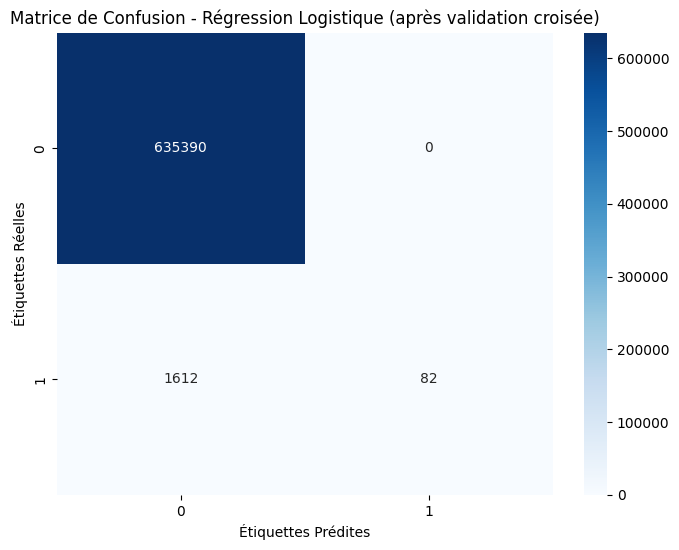

In [31]:
from sklearn.model_selection import cross_val_score

# Création du modèle de régression logistique
logreg_model = LogisticRegression(random_state=42)

# Utilisation de la validation croisée pour évaluer le modèle
cv_scores = cross_val_score(logreg_model, x_train, y_train, cv=5, scoring='f1_macro')

# Affichage des scores de validation croisée
print("Scores de Validation Croisée (F1-score macro) :", cv_scores)
print("Moyenne des Scores de Validation Croisée :", cv_scores.mean())

# Entraînement final du modèle sur toutes les données d'entraînement
logreg_model.fit(x_train, y_train)

# Évaluation du modèle sur les données de test
y_pred_logreg = logreg_model.predict(x_test)

# Calcul des métriques de performance
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg, average='macro')
precision_logreg = precision_score(y_test, y_pred_logreg, average='macro')
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

# Affichage des résultats
print("==============================")
print("Résultats du modèle de Régression Logistique (après validation croisée):")
print(f"Exactitude : {accuracy_logreg:.2f}")
print(f"F1-Score : {f1_logreg:.2f}")
print(f"Précision : {precision_logreg:.2f}")
print("Matrice de Confusion:")
print(conf_matrix_logreg)
print("==============================")

# Affichage de la matrice de confusion sous forme graphique
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Étiquettes Prédites')
plt.ylabel('Étiquettes Réelles')
plt.title('Matrice de Confusion - Régression Logistique (après validation croisée)')
plt.show()


Avec la Validation croiser : 
la precision a augementer jusqu'à 0.99 Tant dis que Le F1-Score jusqu'à 0,55, avec un meilleur temps d'execution 

Scores de Validation Croisée (F1-score macro) : [0.53841304 0.54120604 0.54059428 0.54826185 0.54334453]
Moyenne des Scores de Validation Croisée : 0.5423639474746782
Résultats du modèle de Régression Logistique (après validation croisée et normalisation):
Exactitude : 1.00
F1-Score : 0.54
Précision : 1.00
Matrice de Confusion:
[[635390      0]
 [  1613     81]]


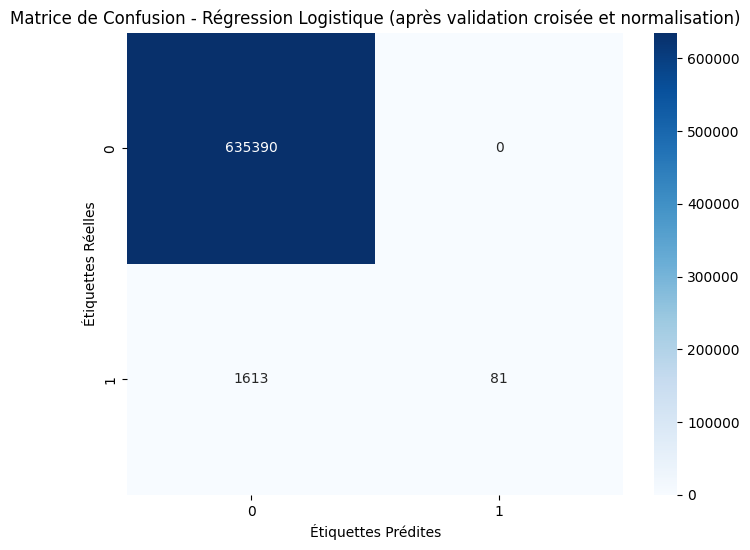

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# ...

# Création du modèle de régression logistique
logreg_model = LogisticRegression(random_state=42)

# Création d'un objet StandardScaler
scaler = StandardScaler()

# Normalisation des données d'entraînement
x_train_normalized = scaler.fit_transform(x_train)

# Utilisation de la validation croisée pour évaluer le modèle
cv_scores = cross_val_score(logreg_model, x_train_normalized, y_train, cv=5, scoring='f1_macro')

# Affichage des scores de validation croisée
print("Scores de Validation Croisée (F1-score macro) :", cv_scores)
print("Moyenne des Scores de Validation Croisée :", cv_scores.mean())

# Entraînement final du modèle sur toutes les données d'entraînement normalisées
logreg_model.fit(x_train_normalized, y_train)

# Normalisation des données de test en utilisant les paramètres de la normalisation des données d'entraînement
x_test_normalized = scaler.transform(x_test)

# Évaluation du modèle sur les données de test normalisées
y_pred_logreg = logreg_model.predict(x_test_normalized)

# Calcul des métriques de performance
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg, average='macro')
precision_logreg = precision_score(y_test, y_pred_logreg, average='macro')
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

# Affichage des résultats
print("==============================")
print("Résultats du modèle de Régression Logistique (après validation croisée et normalisation):")
print(f"Exactitude : {accuracy_logreg:.2f}")
print(f"F1-Score : {f1_logreg:.2f}")
print(f"Précision : {precision_logreg:.2f}")
print("Matrice de Confusion:")
print(conf_matrix_logreg)
print("==============================")

# Affichage de la matrice de confusion sous forme graphique
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Étiquettes Prédites')
plt.ylabel('Étiquettes Réelles')
plt.title('Matrice de Confusion - Régression Logistique (après validation croisée et normalisation)')
plt.show()


Avec la Validation croiser et StandardScaler : 
la precision a augementer jusqu'à 0.99 Tant dis que Le F1-Score jusqu'à 0,55, avec un meilleur temps d'execution 

Le modèle ne peut pas être plus performant avec des données déséquilibrées.